# 종합실습2_2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

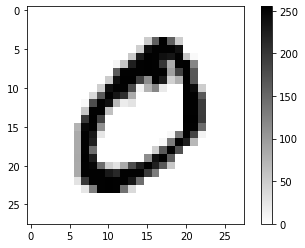

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

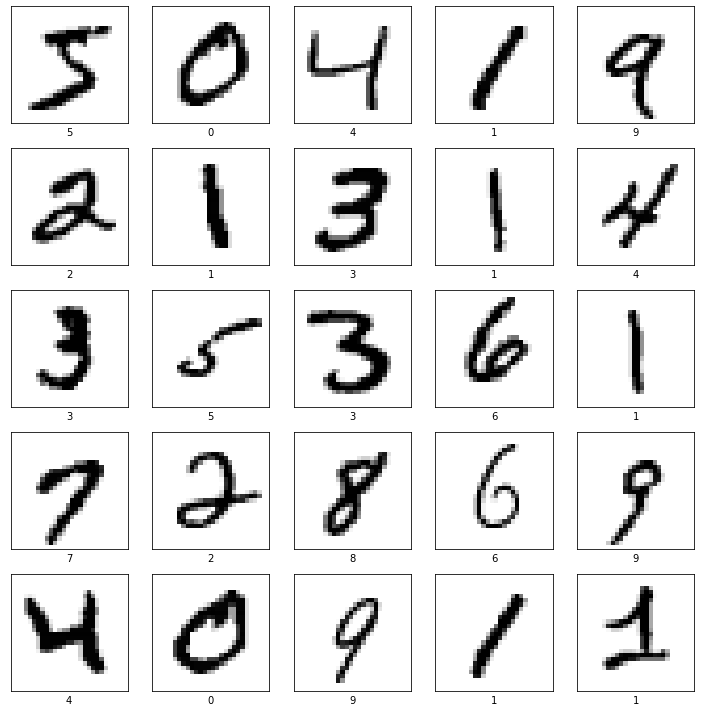

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [8]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
x_train = x_train.reshape(60000, -1)   # 60000개의 데이터를 알아서 옆으로 붙이라는 의미. 28*28을 알아서 계산해서 넣으라는 말과 같음 .
x_val = x_val.reshape(10000, -1)

In [10]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_test를 그냥 255로 나누면 됨

In [11]:
# 한 픽셀당 0~255사이의 값을 가짐.
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [12]:
nfeatures = x_train.shape[1]
nfeatures

784

In [13]:
clear_session()

model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5138 - val_loss: 0.3178
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3177 - val_loss: 0.2851
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2937 - val_loss: 0.2795
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2815 - val_loss: 0.2706
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2738 - val_loss: 0.2698
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2682 - val_loss: 0.2645
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2641 - val_loss: 0.2658
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2603 - val_loss: 0.2625
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2576 - val_loss: 0.2651
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.255

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

## 5. 실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수
    * learning_rate

* 모델1

In [16]:
model1 = Sequential([Dense(512, input_shape=(nfeatures, ),activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(10, activation='softmax')])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

In [18]:
model1.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy')

C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history2 = model1.fit(x_train, y_train, epochs=10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1386 - val_loss: 0.1845
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1359 - val_loss: 0.1974
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1207 - val_loss: 0.2319
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1080 - val_loss: 0.1928
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1131 - val_loss: 0.2161
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1080 - val_loss: 0.1940
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1000 - val_loss: 0.1901
Epoch 8/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0964 - val_loss: 0.2011
Epoch 9/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1035 - val_loss: 0.2464
Epoch 10/10
1500/1500 [==============================] - 10s 7ms/step -

* 모델2